In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/adult-modified.csv",na_values=['?'])

In [121]:
data.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
5,37.0,Private,14,Married,White,Female,40,<=50K
6,49.0,Private,5,Married,Black,Female,16,<=50K
7,52.0,Self-emp,9,Married,White,Male,45,>50K
8,31.0,Private,14,Single,White,Female,50,>50K
9,42.0,Private,13,Married,White,Male,40,>50K


In [122]:
data.columns


Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [123]:
data.describe()

,age,education,hours-per-week
count,9802.000000,10000.000000,10000.000000
mean,38.449806,10.076600,40.530300
std,13.611949,2.548172,12.277197
min,17.000000,1.000000,1.000000
25%,27.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [125]:
## the above indicates that there are some missing values for workclass and age

#### Preprocessing and data analysis:
Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.
Examine the characteristics of the attributes, including summary statistics for the attributes, histograms illustrating the distribtions of numeric attributes, and bar graphs showing value counts for categorical attributes.
Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.
Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [126]:
data[data.isnull().any(axis=1)] ##column

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67.0,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [127]:
##Fill the missing values for all numeric attributes using the mean value for the attribute
processed_data = data.fillna(data.mean(),axis=0)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [128]:
## After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value.
processed_data.dropna(axis=0,inplace=True)
print(processed_data.info())
print()
print(processed_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB
None

(9412, 8)


In [129]:
processed_data.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


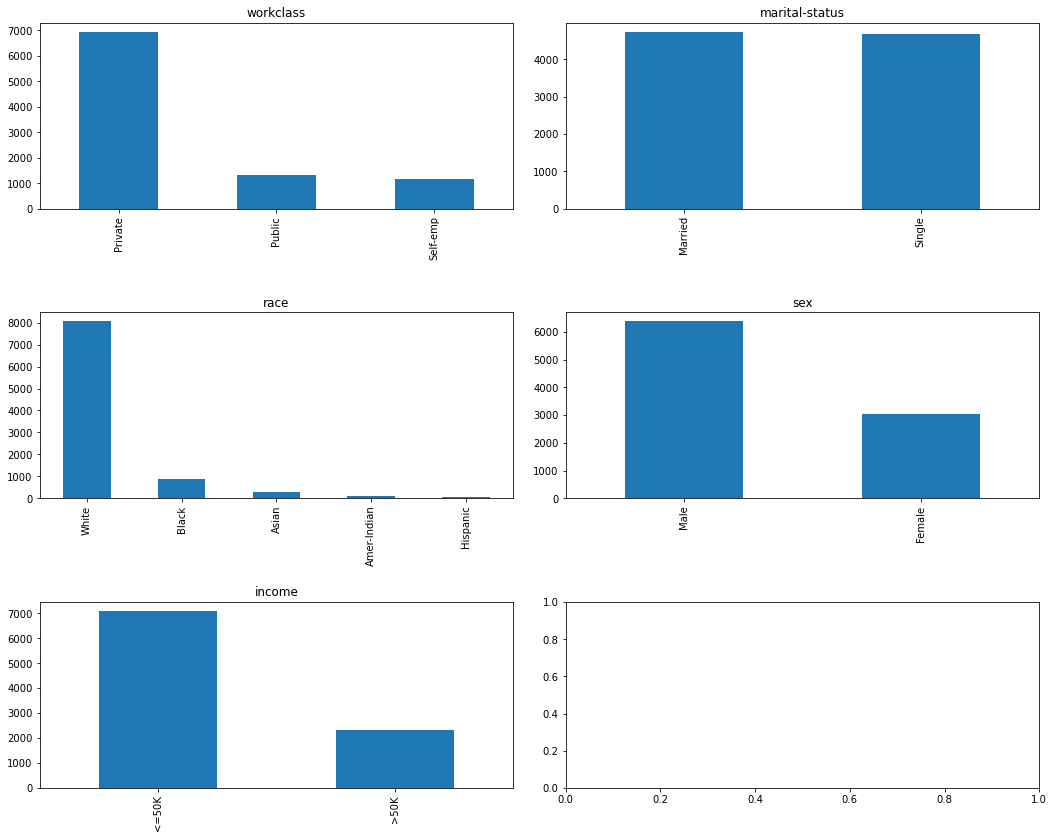

In [130]:
categorical_features = [ 'workclass',  'marital-status', 'race', 'sex', 'income']

fig, ax = plt.subplots(3,2,figsize=(15,12))
ax=ax.flatten()
for i, categorical_feature in enumerate(processed_data[categorical_features]):
    processed_data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
    
fig.tight_layout(pad=2.0)

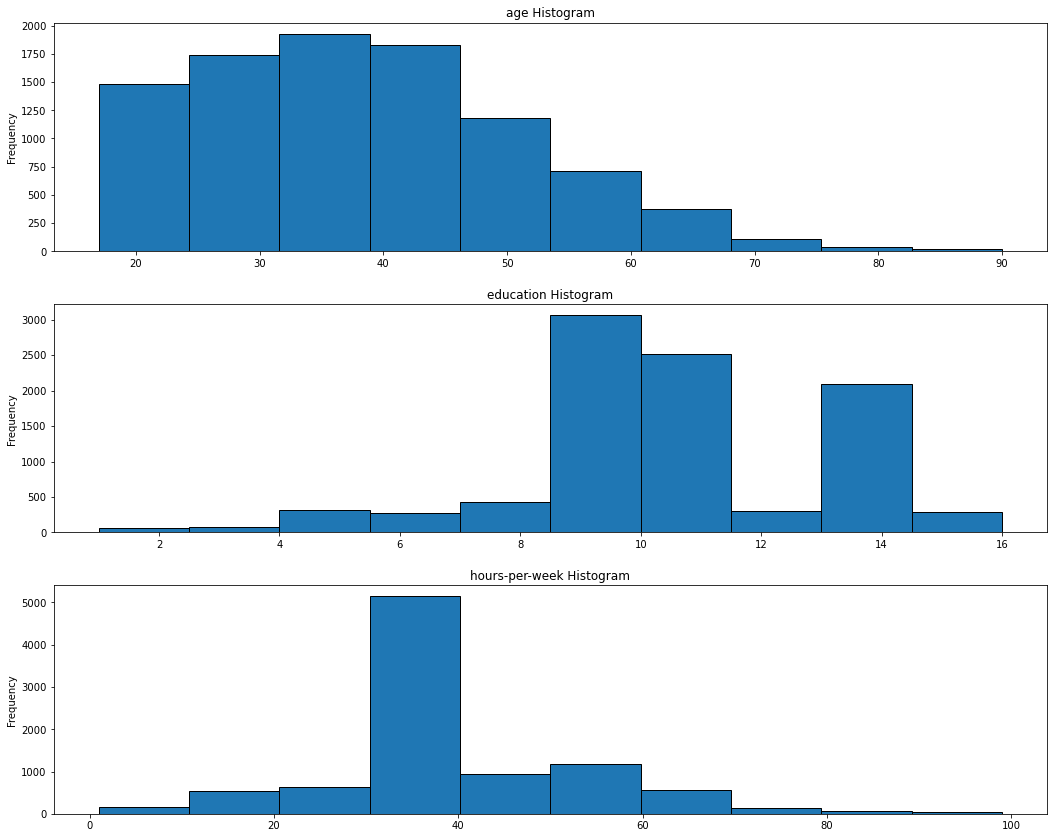

In [131]:

numerical_features = ['age','education','hours-per-week']

fig, ax = plt.subplots(3,1,figsize=(15,12))
ax=ax.flatten()
for i, numerical_feature in enumerate(processed_data[numerical_features]):
    processed_data[numerical_feature].plot(kind="hist", ax=ax[i],grid = False,edgecolor='black').set_title(numerical_feature+" Histogram")
    
fig.tight_layout(pad=2.0)

#### Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. 
####Discuss your observations from this analysis.

In [132]:
print(categorical_features)
print(numerical_features)

['workclass', 'marital-status', 'race', 'sex', 'income']
['age', 'education', 'hours-per-week']


In [133]:
cross_tab_dic={}
cross_tab_dic["education+race"]=['education','race']
cross_tab_dic["work-class+income"]=['workclass','income']
cross_tab_dic["work-class+race"]=['workclass','race']
cross_tab_dic["race+income"]=['race','income']
cross_tab_dic.keys()

dict_keys(['education+race', 'work-class+income', 'work-class+race', 'race+income'])

*********** Performing cross-tabulations (including generating bar charts) for ['education', 'race'] *************** 

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15               

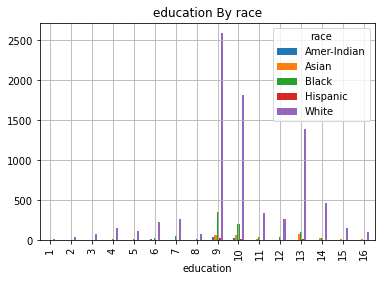


*********** Performing cross-tabulations (including generating bar charts) for ['workclass', 'income'] *************** 

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423


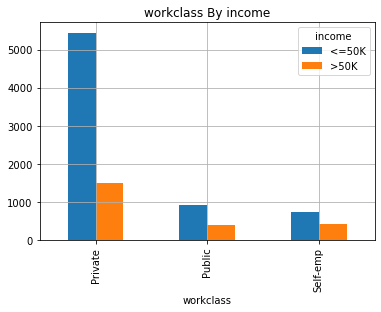


*********** Performing cross-tabulations (including generating bar charts) for ['workclass', 'race'] *************** 

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060


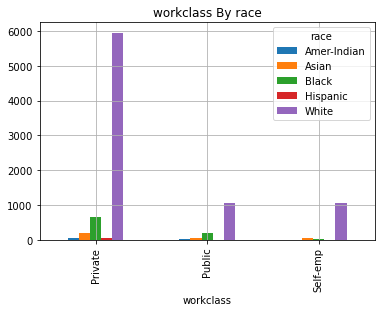


*********** Performing cross-tabulations (including generating bar charts) for ['race', 'income'] *************** 

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118


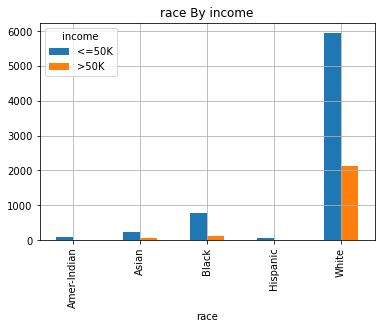



 In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group 


income          <=50K      >50K
race                           
Amer-Indian  0.902174  0.097826
Asian        0.769759  0.230241
Black        0.866592  0.133408
Hispanic     0.920000  0.080000
White        0.737286  0.262714


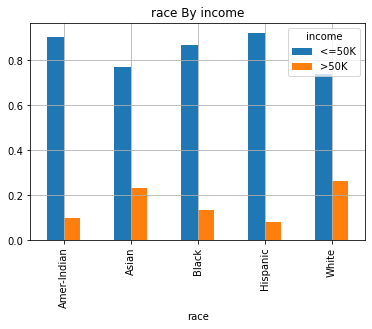

In [134]:
for keys in cross_tab_dic.keys():
    print("*********** Performing cross-tabulations (including generating bar charts) for {} *************** \n".format(cross_tab_dic[keys]))
    cross_tab=pd.crosstab(processed_data[cross_tab_dic[keys][0]],processed_data[cross_tab_dic[keys][1]])
    print(cross_tab)
    plt.show(cross_tab.plot(kind='bar',grid='True',title=cross_tab_dic[keys][0]+' By '+cross_tab_dic[keys][1]))
    if(keys == 'race+income'):
        print("\n\n In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group \n\n")
        newdf = pd.crosstab(processed_data[cross_tab_dic[keys][0]],processed_data[cross_tab_dic[keys][1]]).apply(lambda r: r/r.sum(), axis=1)
        print(newdf)
        plt.show(newdf.plot(kind='bar',grid='True',title=cross_tab_dic[keys][0]+' By '+cross_tab_dic[keys][1]))
    print()

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#C44D58;border-spacing:0;}
.tg td{background-color:#F9CDAD;border-color:#C44D58;border-style:solid;border-width:1px;color:#002b36;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#FE4365;border-color:#C44D58;border-style:solid;border-width:1px;color:#fdf6e3;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-f8tv{border-color:inherit;font-style:italic;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Observation Analysis</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-f8tv">1. It is clear from above that for each race a high percentage population belongs to low income category (&lt;=50K).</td>
  </tr>
  <tr>
    <td class="tg-f8tv">2. However, white race relatively seem have to more people that belong to high income category, followed by Asian and Black.</td>
  </tr>
  <tr>
    <td class="tg-f8tv">3. Hispanic and Amer-Indian&nbsp;&nbsp;relatively have lowest population that belong to high income category</td>
  </tr>
</tbody>
</table>

#### Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

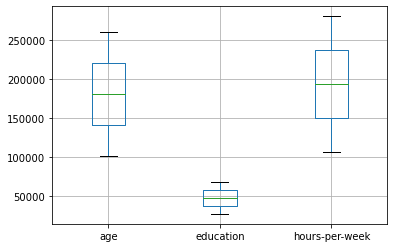

In [151]:
processed_data.groupby('income').sum().boxplot()

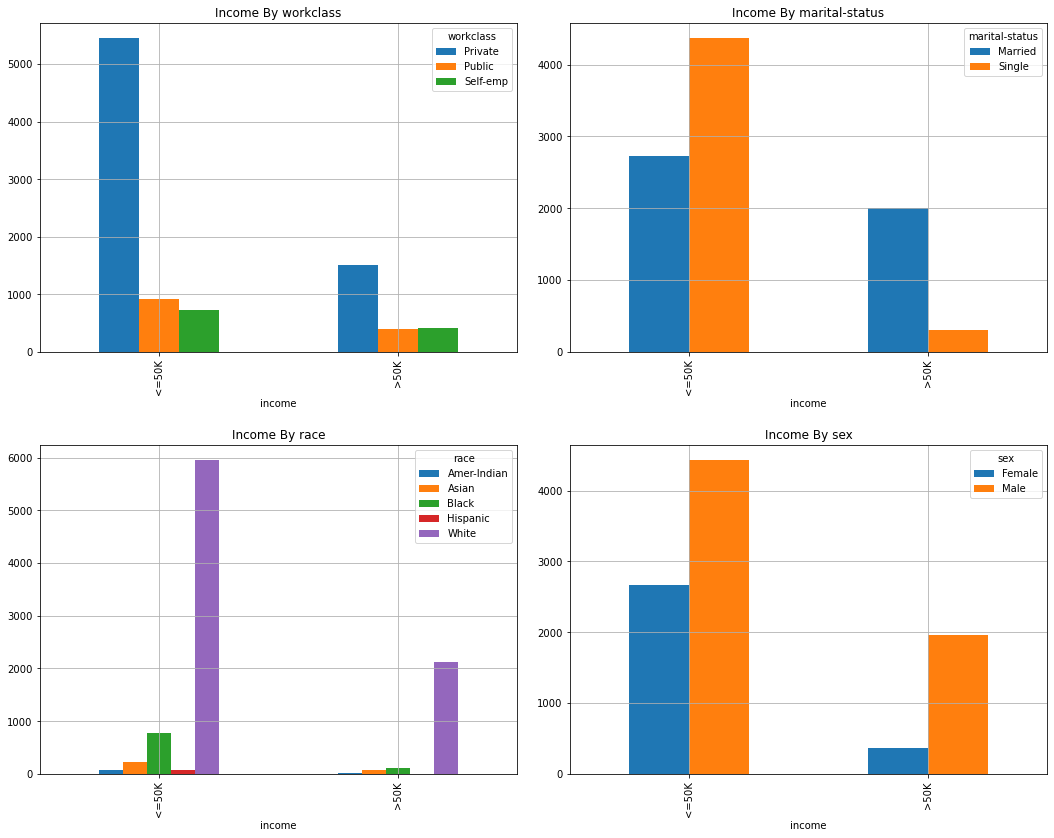

In [149]:
categorical_features = [ 'workclass',  'marital-status', 'race', 'sex']

fig, ax = plt.subplots(2,2,figsize=(15,12))
ax=ax.flatten()
for i, categorical_feature in enumerate(processed_data[categorical_features]):
    cross_tab=pd.crosstab(processed_data['income'],processed_data[categorical_feature])
    cross_tab.plot(kind='bar',grid='True',title='Income By '+categorical_feature, ax=ax[i])
fig.tight_layout(pad=2.0)

In [152]:
processed_data_ssf = pd.get_dummies(processed_data)
processed_data_ssf.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [162]:
corr_data = processed_data_ssf.corr()
corr_data

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034725,0.103214,-0.203096,0.080303,0.187735,0.381243,-0.381243,-0.010861,-0.008094,-0.008679,-0.031995,0.022414,-0.071898,0.071898,-0.232317,0.232317
education,0.034725,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103214,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.203096,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080303,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187735,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381243,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381243,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010861,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008094,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


### Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.
It is clear from above that income increases as with age, income, hours per week.Thus Age, Income and HOurse per week are positively corelated with high income and negatively corelated with low income.

People working in private sector seem to have higher income compared to people working in public sector

Also, looks like female tend to have lower income compared amle counter parts.
Also, married people seem to have high income compared to single people who are mostly in low income category.


# 3.b. => Predictive Modeling and Model Evaluation

## Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps). Split the data into training and test sets (80%-20% split).

In [168]:
processed_data_ssf = pd.get_dummies(processed_data)
columns_context = ['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male']
vs_target = processed_data_ssf['income_>50K']
vs_matrix = processed_data_ssf[columns_context]
vs_matrix.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [170]:
vs_target.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [172]:
#Split the data into training and test sets (80%-20% split).
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print(vs_test.shape)
vs_test[0:5]

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8419,56.0,10,45,1,0,0,1,0,0,0,0,0,1,0,1
2629,54.0,9,45,1,0,0,1,0,0,0,0,0,1,0,1
2523,52.0,11,35,1,0,0,0,1,0,0,0,0,1,1,0
7143,42.0,16,60,0,0,1,1,0,0,0,0,0,1,0,1
5902,30.0,9,50,0,0,1,1,0,0,0,0,0,1,0,1


### Use scikit-learn to build classifiers usinng Naive Bayes (Gaussian), decision tree (using "gini" as selection criteria), and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this to the model accuracy on the training data. Finally, run your model on the set-aside test data.

In [184]:
from sklearn import tree,naive_bayes
from sklearn.model_selection import cross_val_score

In [185]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
print("Naive Bayes (Gaussian) - Score on Training: ", nbclf.score(vs_train, vs_target_train))
print("Naive Bayes (Gaussian) - Score on Test: ", nbclf.score(vs_test, vs_target_test))

Naive Bayes (Gaussian) - Score on Training:  0.720547217425953
Naive Bayes (Gaussian) - Score on Test:  0.7190653212958046


In [186]:
cv_scores = cross_val_score(nbclf, vs_matrix, vs_target, cv=10)
print(' Naive Bayes (Gaussian) cv_scores',cv_scores)
print("\n Naive Bayes (Gaussian) Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

 Naive Bayes (Gaussian) cv_scores [0.72823779 0.70488323 0.73113709 0.70669501 0.73219979 0.70563231
 0.7120085  0.7183847  0.73113709 0.7077577 ]

 Naive Bayes (Gaussian) Overall Accuracy on X-Val: 0.72 (+/- 0.02)


In [189]:
treeclf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=3, max_depth=4)
treeclf = treeclf.fit(vs_train, vs_target_train)
print(" DecisionTreeClassifier - Gini - Score on Training: ", nbclf.score(vs_train, vs_target_train))
print(" DecisionTreeClassifier - Gini - Score on Test: ", nbclf.score(vs_test, vs_target_test))
cv_scores = cross_val_score(treeclf, vs_matrix, vs_target, cv=10)
print('\n DecisionTreeClassifier - Gini cv_scores',cv_scores)
print("\n DecisionTreeClassifier - Gini - Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

 DecisionTreeClassifier - Gini - Score on Training:  0.720547217425953
 DecisionTreeClassifier - Gini - Score on Test:  0.7190653212958046

 DecisionTreeClassifier - Gini cv_scores [0.80679406 0.81104034 0.81190223 0.82784272 0.82465462 0.79808714
 0.80871413 0.81615303 0.81721573 0.81402763]

 DecisionTreeClassifier - Gini - Overall Accuracy on X-Val: 0.81 (+/- 0.02)


In [192]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)

cv_scores = cross_val_score(ldclf, vs_matrix, vs_target, cv=10)

print(" LDA Score on Training: ", ldclf.score(vs_train, vs_target_train))
print(" LDA Score on Test: ", ldclf.score(vs_test, vs_target_test))
print('\n LDA - cv_scores',cv_scores)
print("\n LDA - Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


 LDA Score on Training:  0.8063487846991633
 LDA Score on Test:  0.8109399893786511

 LDA - cv_scores [0.81210191 0.80997877 0.79277365 0.81721573 0.80977683 0.78852285
 0.80021254 0.80765143 0.82146652 0.81615303]

 LDA - Overall Accuracy on X-Val: 0.81 (+/- 0.02)
